In [1]:
import pandas as pd
import os

In [2]:
folder_path = './'

## 파일 합치기 

In [3]:


all_files = os.listdir(folder_path)

# Filter out non-CSV files
csv_files = [f for f in all_files if f.endswith('.csv')]

# Create a list to hold the dataframes
df_list = []

for csv in csv_files:
    file_path = os.path.join(folder_path, csv)
    try:
        # Try reading the file using default UTF-8 encoding
        df = pd.read_csv(file_path)
        df_list.append(df)
    except UnicodeDecodeError:
        try:
            # If UTF-8 fails, try reading the file using UTF-16 encoding with tab separator
            df = pd.read_csv(file_path, sep=',', encoding='utf-16')
            df_list.append(df)
        except Exception as e:
            print(f"Could not read file {csv} because of error: {e}")
    except Exception as e:
        print(f"Could not read file {csv} because of error: {e}")

# Concatenate all data into one DataFrame
big_df = pd.concat(df_list, ignore_index=True)


In [7]:
big_df.head(10)

,type,sourceName,sourceVersion,productType,device,startDate,endDate,activityType,duration,durationUnit,...,totalSwimmingStrokeCount,totalFlightsClimbed,HKAverageMETs,HKIndoorWorkout,HKTimeZone,HKWeatherTemperature,HKWeatherHumidity,HKElevationAscended,HKSwimmingLocationType,HKLapLength
0,HKWorkoutTypeIdentifier,Heewon의 Apple Watch,9.3.1,"Watch5,9","<<HKDevice: 0x28310c960>, name:Apple Watch, ma...",2024-06-24 11:35:17 +0000,2024-06-24 12:10:53 +0000,Badminton,1926.359973,sec,...,NaN,NaN,6.77395 kcal/hr·kg,0.0,Asia/Seoul,NaN,NaN,NaN,NaN,NaN
1,HKWorkoutTypeIdentifier,Heewon의 Apple Watch,9.3.1,"Watch5,9","<<HKDevice: 0x283184aa0>, name:Apple Watch, ma...",2023-08-30 22:55:17 +0000,2023-08-30 23:23:53 +0000,StairClimbing,1715.952943,sec,...,NaN,NaN,11.0814 kcal/hr·kg,0.0,Asia/Seoul,69.674 degF,9200 %,NaN,NaN,NaN
2,HKWorkoutTypeIdentifier,Heewon의 Apple Watch,9.3.1,"Watch5,9","<<HKDevice: 0x283184aa0>, name:Apple Watch, ma...",2024-02-11 09:02:54 +0000,2024-02-11 09:34:15 +0000,StairClimbing,1880.909059,sec,...,NaN,NaN,10.5198 kcal/hr·kg,0.0,Asia/Seoul,38.12 degF,6900 %,NaN,NaN,NaN
3,HKWorkoutTypeIdentifier,Heewon의 Apple Watch,9.3.1,"Watch5,9","<<HKDevice: 0x283184aa0>, name:Apple Watch, ma...",2024-02-17 10:20:38 +0000,2024-02-17 10:52:16 +0000,StairClimbing,1897.909595,sec,...,NaN,NaN,9.94802 kcal/hr·kg,0.0,Asia/Seoul,43.394 degF,6900 %,NaN,NaN,NaN
4,HKWorkoutTypeIdentifier,Heewon의 Apple Watch,9.3.1,"Watch5,9","<<HKDevice: 0x283184aa0>, name:Apple Watch, ma...",2024-03-07 12:18:49 +0000,2024-03-07 12:46:16 +0000,StairClimbing,1647.677833,sec,...,NaN,NaN,9.86503 kcal/hr·kg,0.0,Asia/Seoul,NaN,NaN,NaN,NaN,NaN
5,HKWorkoutTypeIdentifier,Heewon의 Apple Watch,9.3.1,"Watch5,9","<<HKDevice: 0x283184aa0>, name:Apple Watch, ma...",2024-03-12 21:39:58 +0000,2024-03-12 22:07:42 +0000,StairClimbing,1664.237770,sec,...,NaN,NaN,9.94168 kcal/hr·kg,0.0,Asia/Seoul,NaN,NaN,NaN,NaN,NaN
6,HKWorkoutTypeIdentifier,Heewon의 Apple Watch,9.3.1,"Watch5,9","<<HKDevice: 0x283184aa0>, name:Apple Watch, ma...",2024-03-17 06:42:23 +0000,2024-03-17 07:11:41 +0000,StairClimbing,1757.917809,sec,...,NaN,NaN,10.8563 kcal/hr·kg,0.0,Asia/Seoul,NaN,NaN,NaN,NaN,NaN
7,HKWorkoutTypeIdentifier,Heewon의 Apple Watch,9.3.1,"Watch5,9","<<HKDevice: 0x283184aa0>, name:Apple Watch, ma...",2024-03-20 22:43:08 +0000,2024-03-20 23:07:21 +0000,StairClimbing,1452.395349,sec,...,NaN,NaN,10.82 kcal/hr·kg,0.0,Asia/Seoul,32.612 degF,7100 %,NaN,NaN,NaN
8,HKWorkoutTypeIdentifier,Heewon의 Apple Watch,9.3.1,"Watch5,9","<<HKDevice: 0x283184aa0>, name:Apple Watch, ma...",2024-03-29 13:21:07 +0000,2024-03-29 13:47:59 +0000,StairClimbing,1611.889434,sec,...,NaN,NaN,10.2371 kcal/hr·kg,0.0,Asia/Seoul,NaN,NaN,NaN,NaN,NaN
9,HKWorkoutTypeIdentifier,Heewon의 Apple Watch,9.3.1,"Watch5,9","<<HKDevice: 0x283184aa0>, name:Apple Watch, ma...",2024-04-04 12:57:25 +0000,2024-04-04 13:13:24 +0000,StairClimbing,959.789049,sec,...,NaN,NaN,10.3588 kcal/hr·kg,0.0,Asia/Seoul,55.778 degF,5700 %,NaN,NaN,NaN


In [5]:
big_df['activityType'].unique()

array(['Badminton', 'StairClimbing', 'Cooldown', 'Tennis', 'Pilates',
       'Hiking', 'Yoga', 'Golf', 'CoreTraining', 'Swimming',
       'CardioDance', 'Running', 'Cycling', 'Walking'], dtype=object)

In [18]:
big_df['date']= pd.to_datetime(big_df['startDate']).dt.date

In [23]:
big_df['year']= pd.to_datetime(big_df['startDate']).dt.year

In [8]:
big_df['HKTimeZone'].unique()

array(['Asia/Seoul', 'Europe/Ljubljana', 'America/New_York', 'Asia/Tokyo'],
      dtype=object)

In [24]:
big_df.groupby(['activityType', 'year']).size()

activityType   year
Badminton      2024     1
CardioDance    2023     1
Cooldown       2023     1
CoreTraining   2023    13
               2024    20
Cycling        2023    48
               2024     6
Golf           2023     2
Hiking         2023     4
Pilates        2023     9
               2024     7
Running        2023     6
               2024     7
StairClimbing  2023     1
               2024    10
Swimming       2024     1
Tennis         2023    45
               2024     1
Walking        2023    56
               2024    25
Yoga           2023    23
dtype: int64

In [25]:
big_df.columns

Index(['type', 'sourceName', 'sourceVersion', 'productType', 'device',
       'startDate', 'endDate', 'activityType', 'duration', 'durationUnit',
       'totalEnergyBurned', 'totalDistance', 'totalSwimmingStrokeCount',
       'totalFlightsClimbed', 'HKAverageMETs', 'HKIndoorWorkout', 'HKTimeZone',
       'HKWeatherTemperature', 'HKWeatherHumidity', 'HKElevationAscended',
       'HKSwimmingLocationType', 'HKLapLength', 'date', 'year'],
      dtype='object')

In [70]:
big_df['day']= pd.to_datetime(big_df['startDate']).dt.day_name()

In [29]:
big_df [ big_df['duration']== big_df['duration'].max() ] 

,type,sourceName,sourceVersion,productType,device,startDate,endDate,activityType,duration,durationUnit,...,HKAverageMETs,HKIndoorWorkout,HKTimeZone,HKWeatherTemperature,HKWeatherHumidity,HKElevationAscended,HKSwimmingLocationType,HKLapLength,date,year
204,HKWorkoutTypeIdentifier,Heewon의 Apple Watch,9.3.1,"Watch5,9","<<HKDevice: 0x2832f5a90>, name:Apple Watch, ma...",2024-05-08 20:12:04 +0000,2024-05-08 23:39:12 +0000,Cycling,12428.05936,sec,...,4.04439 kcal/hr·kg,0.0,America/New_York,85.01 degF,4100 %,4759 cm,NaN,NaN,2024-05-08,2024


In [39]:
big_df.groupby(['activityType', 'day']).size()

activityType   day      
Badminton      Monday        1
CardioDance    Sunday        1
Cooldown       Wednesday     1
CoreTraining   Friday        3
               Monday        7
               Saturday      2
               Sunday        5
               Thursday      3
               Tuesday       6
               Wednesday     7
Cycling        Friday        4
               Monday        7
               Saturday      5
               Sunday       20
               Thursday      8
               Tuesday       6
               Wednesday     4
Golf           Friday        1
               Saturday      1
Hiking         Sunday        2
               Tuesday       2
Pilates        Monday        4
               Saturday      3
               Sunday        3
               Thursday      1
               Tuesday       2
               Wednesday     3
Running        Friday        3
               Monday        1
               Sunday        1
               Thursday      3
              

In [73]:
big_df.columns

Index(['sourceName', 'sourceVersion', 'productType', 'device', 'startDate',
       'endDate', 'activityType', 'duration', 'durationUnit',
       'totalEnergyBurned', 'totalDistance', 'totalSwimmingStrokeCount',
       'totalFlightsClimbed', 'HKAverageMETs', 'HKIndoorWorkout', 'HKTimeZone',
       'HKWeatherTemperature', 'HKWeatherHumidity', 'HKElevationAscended',
       'HKSwimmingLocationType', 'HKLapLength', 'date', 'year', 'day',
       'EnergyBurnedperMinute', 'month', 'durationInMinutes'],
      dtype='object')

In [49]:
big_df['EnergyBurnedperMinute']= big_df['totalEnergyBurned'].str.replace(' kcal','').astype(float) / (big_df['duration']/60) 

In [69]:
big_df['month']= pd.to_datetime(big_df['startDate']).dt.month

In [75]:
big_df['ts'] = pd.to_datetime(big_df['startDate']).dt.time

In [77]:
big_df['endts'] = pd.to_datetime(big_df['endDate']).dt.time

In [71]:
big_df['durationInMinutes']= (big_df['duration']/60) 

In [78]:
big_df.head()

,sourceName,sourceVersion,productType,device,startDate,endDate,activityType,duration,durationUnit,totalEnergyBurned,...,HKSwimmingLocationType,HKLapLength,date,year,day,EnergyBurnedperMinute,month,durationInMinutes,ts,endts
0,Heewon의 Apple Watch,9.3.1,"Watch5,9","<<HKDevice: 0x28310c960>, name:Apple Watch, ma...",2024-06-24 11:35:17 +0000,2024-06-24 12:10:53 +0000,Badminton,1926.359973,sec,147.39 kcal,...,NaN,NaN,2024-06-24,2024,Monday,4.590731,6,32.106000,11:35:17,12:10:53
1,Heewon의 Apple Watch,9.3.1,"Watch5,9","<<HKDevice: 0x283184aa0>, name:Apple Watch, ma...",2023-08-30 22:55:17 +0000,2023-08-30 23:23:53 +0000,StairClimbing,1715.952943,sec,226.87 kcal,...,NaN,NaN,2023-08-30,2023,Wednesday,7.932735,8,28.599216,22:55:17,23:23:53
2,Heewon의 Apple Watch,9.3.1,"Watch5,9","<<HKDevice: 0x283184aa0>, name:Apple Watch, ma...",2024-02-11 09:02:54 +0000,2024-02-11 09:34:15 +0000,StairClimbing,1880.909059,sec,235.224 kcal,...,NaN,NaN,2024-02-11,2024,Sunday,7.503521,2,31.348484,09:02:54,09:34:15
3,Heewon의 Apple Watch,9.3.1,"Watch5,9","<<HKDevice: 0x283184aa0>, name:Apple Watch, ma...",2024-02-17 10:20:38 +0000,2024-02-17 10:52:16 +0000,StairClimbing,1897.909595,sec,222.681 kcal,...,NaN,NaN,2024-02-17,2024,Saturday,7.039777,2,31.631827,10:20:38,10:52:16
4,Heewon의 Apple Watch,9.3.1,"Watch5,9","<<HKDevice: 0x283184aa0>, name:Apple Watch, ma...",2024-03-07 12:18:49 +0000,2024-03-07 12:46:16 +0000,StairClimbing,1647.677833,sec,191.247 kcal,...,NaN,NaN,2024-03-07,2024,Thursday,6.964238,3,27.461297,12:18:49,12:46:16


## 불필요한 컬럼 삭제 

In [58]:
big_df['sourceName'].unique()

array(['Heewon의 Apple\xa0Watch'], dtype=object)

In [59]:
big_df['sourceVersion'].unique()

array(['9.3.1', '9.3', '9.2', 9.2], dtype=object)

In [60]:
big_df['productType'].unique()

array(['Watch5,9'], dtype=object)

In [62]:
big_df['durationUnit'].unique()

array(['sec'], dtype=object)

In [63]:
big_df['HKTimeZone'].unique()

array(['Asia/Seoul', 'Europe/Ljubljana', 'America/New_York', 'Asia/Tokyo'],
      dtype=object)

In [80]:
# big_df.drop(['type'], inplace=True, axis=1)

## CSV 파일로 저장 

In [81]:
big_df.to_csv('wonnieworkout.csv', index=False)

In [ ]:
## 

In [ ]:
df.groupby(['cluster']).mean() big_df['EnergyBurnedperMinute']

In [84]:
import matplotlib.pyplot as plt

In [87]:
filtered_data= big_df.groupby(['activityType', 'day']).size().reset_index(name='count')

In [91]:
filtered_data

,activityType,day,count
0,Badminton,Monday,1
1,CardioDance,Sunday,1
2,Cooldown,Wednesday,1
3,CoreTraining,Friday,3
4,CoreTraining,Monday,7
5,CoreTraining,Saturday,2
6,CoreTraining,Sunday,5
7,CoreTraining,Thursday,3
8,CoreTraining,Tuesday,6
9,CoreTraining,Wednesday,7


In [95]:
import numpy as np

In [97]:
df = pd.DataFrame({'col1':[1,2,3], 'col2':[4,5,6]}, 
                  index = ['row1','row2','row3'])

dfstacked = df.stack()

mask = dfstacked <= 3

In [100]:
filtered_data['activityType'].unique().shape

(14,)

In [101]:
color=np.array(['rgb(255,255,255)']*filtered_data['activityType'].unique().shape[0])

ValueError: Invalid RGBA argument: 'rgb(255,255,255)'

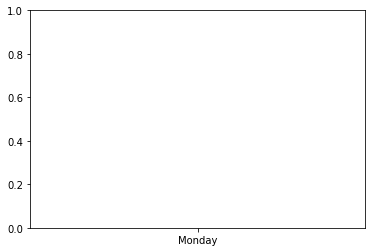

In [102]:
chart = plt.bar(filtered_data['day'], filtered_data['count'], color=color)
colors = ['seagreen','red','orange','seagreen','purple','yellow','seagreen','blue','brown']

In [ ]:
 plt.savefig('graph1.png')